## IRIS FLOWER CLASSIFICATION 
## Problem Statement :

## Iris flower has three species : Setosa , Versicolor & Virginica , which differs according to their measurements. 

## Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

In [2]:
#importing modules 
import pandas as pd # to read dataset
import matplotlib.pyplot as plt # to visualize data as graphs (detailed)
import os # to add files when necessary 
import numpy as np # to do operations on arrays
import seaborn as sns # graph model plotting(simple)

In [8]:
#Upload the dataset
iris = pd.read_csv('Iris.csv')
#delete unecessary column(s)
iris = iris.drop(columns = ['Id'])
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
#to display details/status of the data :
#iris.describe()
#to display basic information of the datatypes :
#iris.info()
#to display the number of samples in each class :
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [15]:
#PREPROCESSING  :
# checking for null values :
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

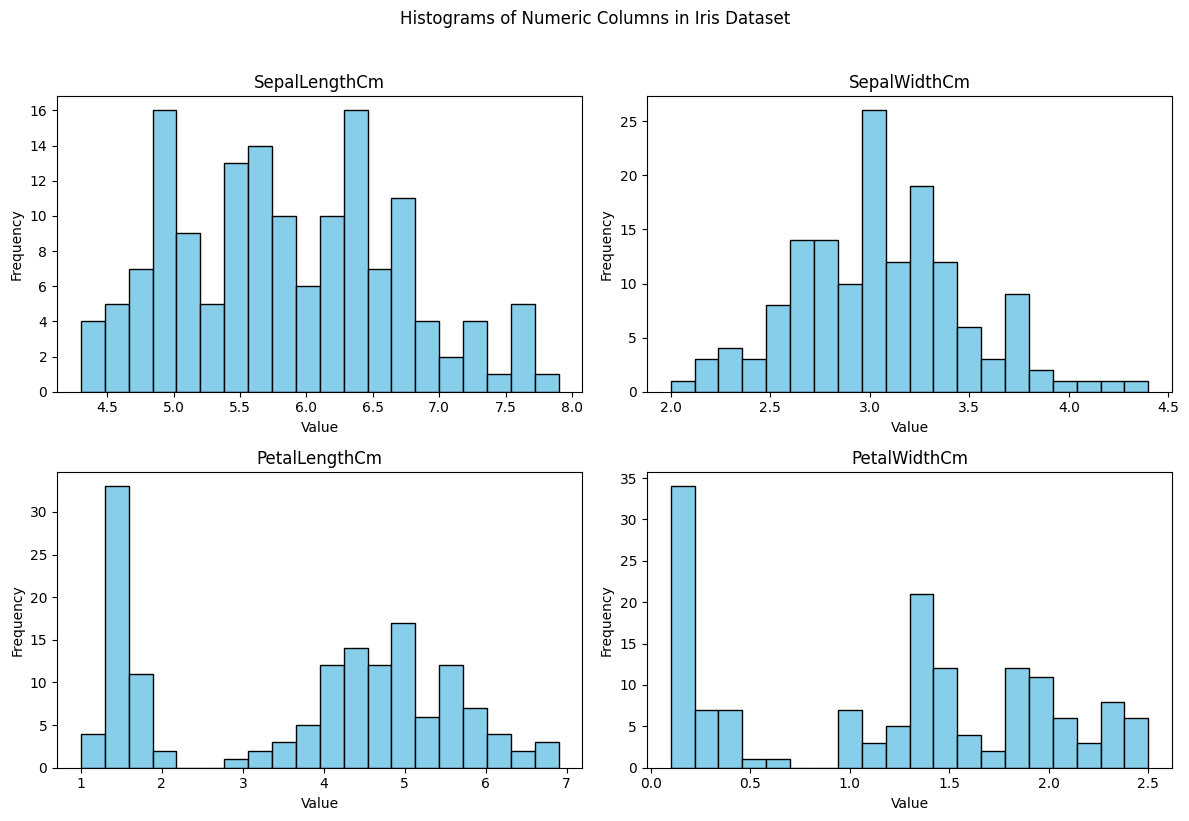

In [41]:
#EXPLORATORY DATA ANALYSIS / DATA VISUALIZATION
#to display a histogram 
numeric_columns = iris.select_dtypes(include='number').columns

# Create subplots for each numeric column
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Histograms of Numeric Columns in Iris Dataset', y=1.02)

# Plot histograms for each numeric column
for i, column in enumerate(numeric_columns):
    row, col = i // 2, i % 2
    axes[row, col].hist(iris[column], bins=20, color='skyblue', edgecolor='black')
    axes[row, col].set_title(column)
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

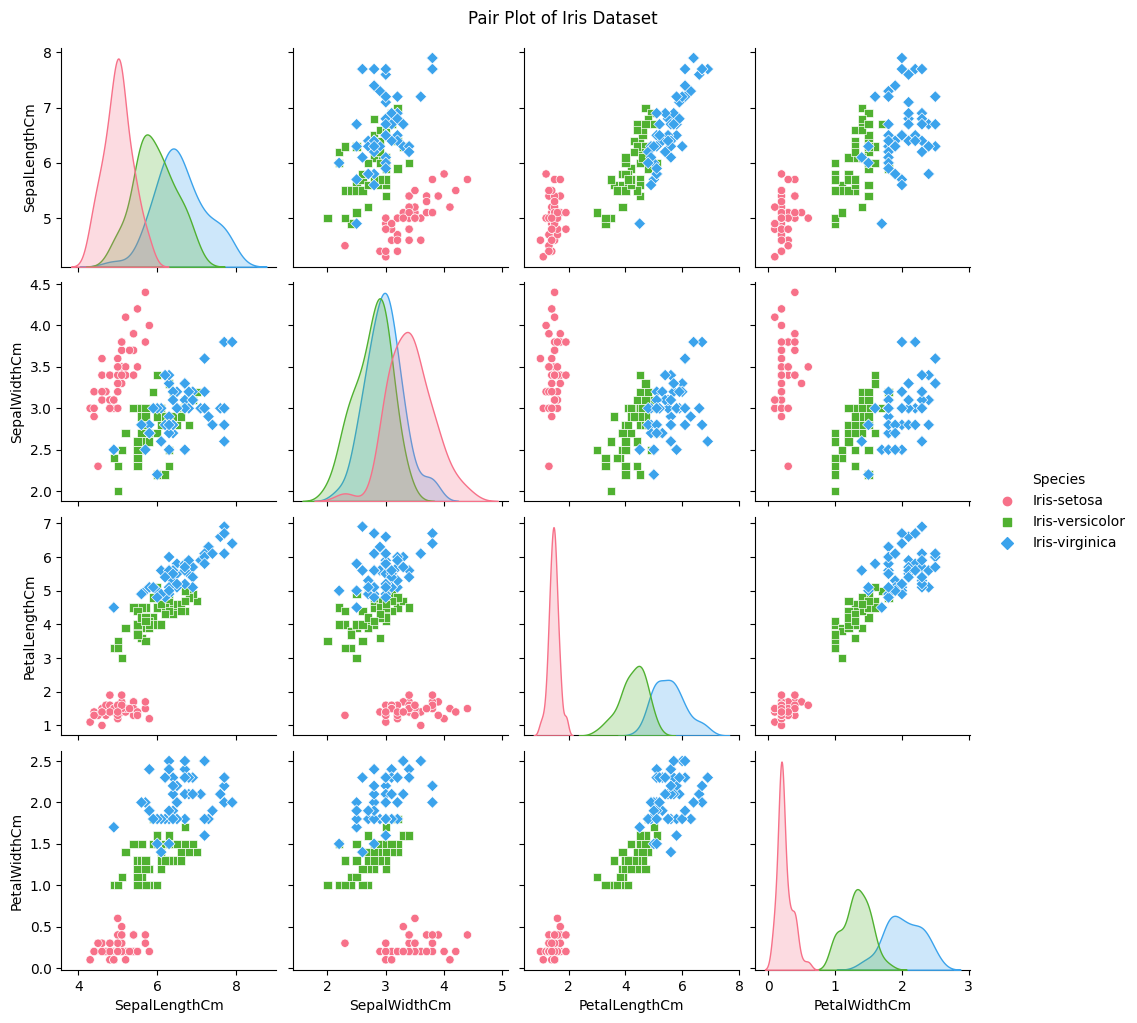

In [38]:
sns.pairplot(iris, hue="Species", markers=["o", "s", "D"], palette="husl", height=2.5)
plt.suptitle("Pair Plot of Iris Dataset", y=1.02)
plt.show()

In [42]:
#Correlation Matrix
iris.corr()

C:\Users\LEGION\AppData\Local\Temp\ipykernel_18724\3352053907.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


C:\Users\LEGION\AppData\Local\Temp\ipykernel_18724\3695658994.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_cr = iris.corr()


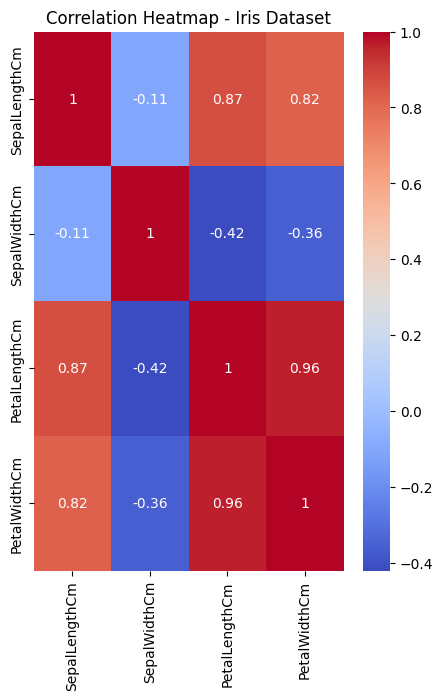

In [52]:
iris_cr = iris.corr()
fig, ax = plt.subplots(figsize=(5,7))
#to display heatmap
sns.heatmap(iris_cr, annot=True, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Heatmap - Iris Dataset')
plt.show()

In [53]:
#LABEL ENCODER
from sklearn.preprocessing import LabelEncoder
iris_le = LabelEncoder()

In [54]:
iris['Species'] = iris_le.fit_transform(iris['Species'])
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## MODEL TRAINING 

In [55]:
# 70% - training data ; 30% test data :
from sklearn.model_selection import train_test_split
X = iris.drop(columns=['Species'])
Y = iris['Species']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.30)

### LOGISTIC REGRESSION 

In [56]:
from sklearn.linear_model import LogisticRegression
iris_classification = LogisticRegression()

In [57]:
#model training :
iris_classification.fit(x_train,y_train)

LogisticRegression()

In [59]:
print("Accuracy : ", iris_classification.score(x_test,y_test)*100 , "%")

Accuracy :  100.0 %


### KNN (K-NEAREST NEIGHBOUR)


In [61]:
from sklearn.neighbors import KNeighborsClassifier
iris_classification = KNeighborsClassifier()

In [62]:
iris_classification.fit(x_train,y_train)

KNeighborsClassifier()

In [63]:
print("Accuracy : ", iris_classification.score(x_test,y_test)*100 , "%")

Accuracy :  97.77777777777777 %


### DECISION TREE

In [65]:
from sklearn.tree import DecisionTreeClassifier
iris_classification = DecisionTreeClassifier()

In [66]:
iris_classification.fit(x_train,y_train)

DecisionTreeClassifier()

In [67]:
print("Accuracy : ", iris_classification.score(x_test,y_test)*100 , "%")

Accuracy :  95.55555555555556 %
